In [17]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

--2025-09-16 12:50:26--  https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70702765 (67M) [application/zip]
Saving to: ‘cats_and_dogs.zip.1’

cats_and_dogs.zip.1 100%[===================>]  67.43M   285MB/s    in 0.2s    

2025-09-16 12:50:26 (285 MB/s) - ‘cats_and_dogs.zip.1’ saved [70702765/70702765]

Archive:  cats_and_dogs.zip
replace cats_and_dogs/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# 3
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                             directory=validation_dir,
                                                             target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                             class_mode='binary')

test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                        directory=test_dir,
                                                        target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                        # class_mode='binary', # Remove class_mode for test data
                                                        # shuffle=False, # Remove shuffle for test data
                                                        classes=None # Set classes to None
                                                        )

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# 5
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    zoom_range=0.5,
    horizontal_flip=True,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    fill_mode="nearest"
)

In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
# 7
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

# i increased the number epoch to increese the model Accuracy

In [14]:
# 8
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=30, # Increased epochs
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 72s 5s/step - accuracy: 0.4917 - loss: 1.0066 - val_accuracy: 0.4922 - val_loss: 0.6899
Epoch 2/15
 1/15 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.4531 - loss: 0.6914

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.4531 - loss: 0.6914 - val_accuracy: 0.4922 - val_loss: 0.6896
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 83s 6s/step - accuracy: 0.4968 - loss: 0.6898 - val_accuracy: 0.5033 - val_loss: 0.6834
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 527ms/step - accuracy: 0.4219 - loss: 0.7015 - val_accuracy: 0.5011 - val_loss: 0.6762
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 85s 6s/step - accuracy: 0.5251 - loss: 0.6790 - val_accuracy: 0.6183 - val_loss: 0.6587
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.5234 - loss: 0.6889 - val_accuracy: 0.5938 - val_loss: 0.6481
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 83s 5s/step - accuracy: 0.5441 - loss: 0.6587 - val_accuracy: 0.6373 - val_loss: 0.6137
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 526ms/step - accuracy: 0.5938 - loss: 0.6427 - val_accuracy: 0.6853 - val_loss: 0.6270
Epoch 9/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 144s 6s/step - accuracy: 0.5880 - loss: 0.6508 - val_accuracy: 0.6496 - val_loss: 0.6

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 623ms/step - accuracy: 0.6719 - loss: 0.6619 - val_accuracy: 0.6786 - val_loss: 0.6133
Epoch 11/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 67s 4s/step - accuracy: 0.6065 - loss: 0.6349 - val_accuracy: 0.6853 - val_loss: 0.6323
Epoch 12/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6094 - loss: 0.6519 - val_accuracy: 0.6864 - val_loss: 0.6423
Epoch 13/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 121s 4s/step - accuracy: 0.6398 - loss: 0.6129 - val_accuracy: 0.6953 - val_loss: 0.5952
Epoch 14/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 602ms/step - accuracy: 0.6562 - loss: 0.5911 - val_accuracy: 0.7020 - val_loss: 0.5920
Epoch 15/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 81s 5s/step - accuracy: 0.6226 - loss: 0.6190 - val_accuracy: 0.6685 - val_loss: 0.5776


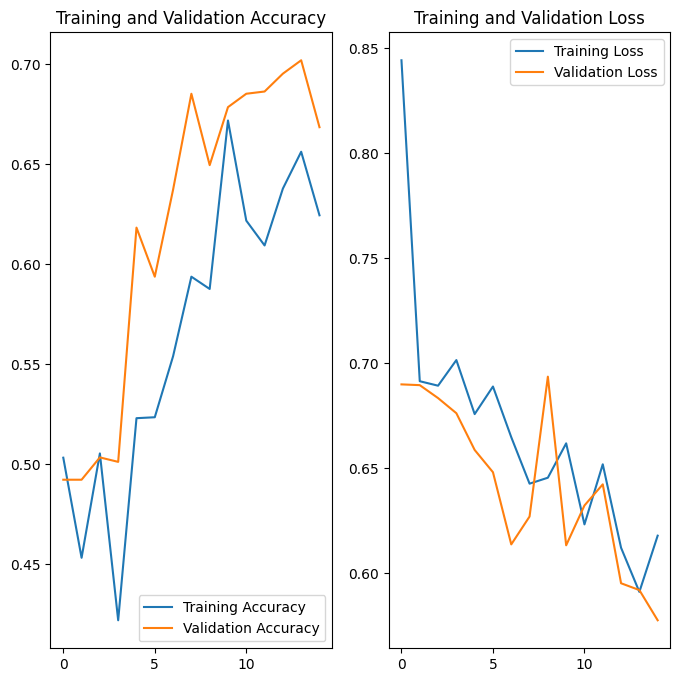

In [15]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
# 10
predictions = model.predict(test_data_gen)
probabilities = tf.nn.sigmoid(predictions).numpy().flatten()

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


ValueError: The PyDataset has length 0

In [ ]:
# 10
sample_test_images, _ = next(test_data_gen)
plotImages(sample_test_images[:5], probabilities=probabilities[:5])

In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")